In [948]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [949]:
url = "https://raw.githubusercontent.com/mehreengillani/DATA602_FinalProject/refs/heads/main/Airbnb_site_hotel%20new.csv"
airbnb = pd.read_csv(url)
airbnb.head(5)

/var/folders/6w/rkqvbjtx04s93768hcryddtc0000gn/T/ipykernel_6278/1075038050.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv(url)


,id,name,host_id,host_name,city,price,reply time,guest favourite,host since,host Certification,...,total reviewers number,accommodates,bathrooms,bedrooms,beds,listing number,host response rate,host acceptance rate,sales,area
0,1,Beautiful Victorian Home,1368256,Robert,Toronto,250,0.0,0,4563,1.0,...,47,6,"1,5",2,3,1,"0,9","0,42",102,North America
1,2,"World Class @ CN Tower, convention centre, The...",113345,Adela,Toronto,152,0.0,0,5120,1.0,...,42,4,1,1,2,5,"0,9","0,42",166,North America
2,3,Furnished room in lovely Annex house June -Oct31,1466410,Susan,Toronto,120,0.0,0,4534,1.0,...,0,1,1,1,2,2,1,"0,65",181,North America
3,4,Executive Studio Unit- Ideal for One Person,118124,Brent,Toronto,75,1.0,1,5111,1.0,...,29,1,1,0,1,1,1,1,365,North America
4,5,"Bright Beaches Apt, close to everything",175687,John,Toronto,90,0.0,0,5033,1.0,...,7,2,1,1,1,4,1,"0,8",328,North America


In [950]:
#summary
airbnb.describe()

,id,host_id,reply time,guest favourite,host since,host Certification,room_type,host total listings count,total reviewers number,accommodates,bedrooms,beds,listing number,sales
count,86186.000000,8.618600e+04,66867.000000,86186.000000,86186.000000,82903.0,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000
mean,43093.500000,1.959076e+08,0.769857,0.273304,2380.740236,1.0,2.663959,23.492737,36.414174,3.412747,1.247407,1.914441,45.196772,183.385086
std,24879.899487,1.849803e+08,0.420928,0.445658,1269.305372,0.0,0.524877,73.067586,75.989911,2.393287,1.093598,1.732507,258.312637,119.302210
min,1.000000,1.581000e+03,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,21547.250000,2.890381e+07,1.000000,0.000000,1422.000000,1.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,80.000000
50%,43093.500000,1.308280e+08,1.000000,0.000000,2540.000000,1.0,3.000000,3.000000,9.000000,2.000000,1.000000,1.000000,3.000000,193.000000
75%,64639.750000,3.492982e+08,1.000000,1.000000,3337.000000,1.0,3.000000,12.000000,37.000000,4.000000,2.000000,2.000000,15.000000,287.000000
max,86186.000000,5.752345e+08,1.000000,1.000000,5745.000000,1.0,4.000000,837.000000,2575.000000,16.000000,21.000000,60.000000,4818.000000,365.000000


In [951]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86186 entries, 0 to 86185
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         86186 non-null  int64  
 1   name                       86186 non-null  object 
 2   host_id                    86186 non-null  int64  
 3   host_name                  86186 non-null  object 
 4   city                       86186 non-null  object 
 5   price                      80762 non-null  object 
 6   reply time                 66867 non-null  float64
 7   guest favourite            86186 non-null  int64  
 8   host since                 86186 non-null  int64  
 9   host Certification         82903 non-null  float64
 10  room_type                  86186 non-null  int64  
 11  host total listings count  86186 non-null  int64  
 12  consumer                   35421 non-null  object 
 13  total reviewers number     86186 non-null  int

In [952]:
print("Initial dataset shape:", airbnb.shape)



Initial dataset shape: (86186, 23)


# Data Cleaning

In [953]:
# lets drop non-essential columns 
# Columns to drop
cols_to_drop = [ 'id',
    'name', 'host_name', 'sales', 
    'listing number',
    'host Certification'
]
# Drop columns
airbnb = airbnb.drop(columns=cols_to_drop, errors='ignore')

In [954]:
airbnb.shape

(86186, 17)

# Handling missing values

In [955]:
# Step 2: Initial Data Assessment
print("Missing values before cleaning:")
print(airbnb.isnull().sum().sort_values(ascending=False))

print("\nDataset overview:")
print(f"Total rows: {len(airbnb)}")
print(f"Total columns: {len(airbnb.columns)}")

Missing values before cleaning:
consumer                     50765
reply time                   19319
price                         5424
accommodates                     0
host acceptance rate             0
host response rate               0
beds                             0
bedrooms                         0
bathrooms                        0
host_id                          0
total reviewers number           0
city                             0
host total listings count        0
room_type                        0
host since                       0
guest favourite                  0
area                             0
dtype: int64

Dataset overview:
Total rows: 86186
Total columns: 17


In [956]:
# Step 3: Handle Missing Values

# Create a copy for cleaning
df = airbnb.copy()

# Check percentage of missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage:")
print(missing_pct.sort_values(ascending=False).round(2))

Missing value percentage:
consumer                     58.90
reply time                   22.42
price                         6.29
accommodates                  0.00
host acceptance rate          0.00
host response rate            0.00
beds                          0.00
bedrooms                      0.00
bathrooms                     0.00
host_id                       0.00
total reviewers number        0.00
city                          0.00
host total listings count     0.00
room_type                     0.00
host since                    0.00
guest favourite               0.00
area                          0.00
dtype: float64


Analyze Missing Value Patterns and Prioritize Columns

Based on percentages missing value, here's the initial analysis and prioritization:

consumer (58.90%) - Very high missing rate - delete column
reply time (22.42%) - High missing rate - fill unknown
Moderate Missing (5-20%) - Imputation Candidates

price (6.29%) - Critical feature, needs careful imputation
host Certification (3.81%) - Moderate missing
Low/No Missing (<5%) - Safe to Keep

All other columns (0% missing) - No action needed

In [957]:
# Drop consumer column
df = df.drop(columns=['consumer'])

df['reply time'] = df['reply time'].fillna(df['reply time'].median())
# convert to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group imputation 
df['price'] = df.groupby(['city', 'room_type', 'accommodates'])['price'] \
                .transform(lambda x: x.fillna(x.median()))
# Fill remaining with more granular groups
if df['price'].isnull().any():
    df['price'] = df.groupby(['bedrooms', 'bathrooms'])['price'] \
                    .transform(lambda x: x.fillna(x.median()))

# Final fill with global median if still missing
df['price'] = df['price'].fillna(df['price'].median())


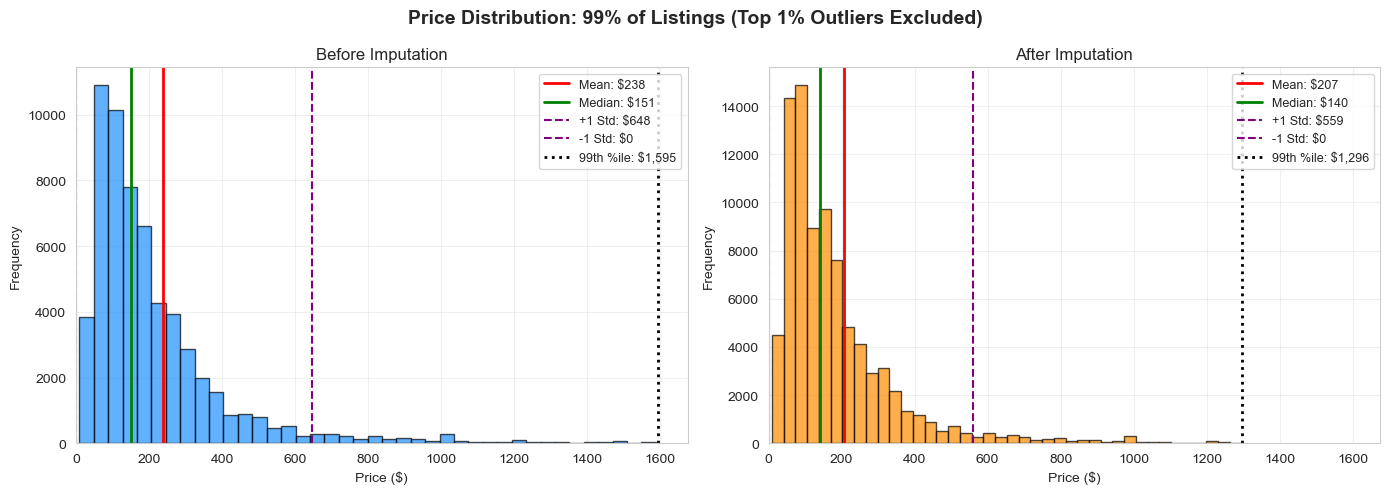

In [958]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate statistics
mean_original = original_prices.mean()
median_original = original_prices.median()
std_original = original_prices.std()

mean_imputed = imputed_prices.mean()
median_imputed = imputed_prices.median()
std_imputed = imputed_prices.std()

# Calculate 99th percentiles
p99_original = np.percentile(original_prices, 99)
p99_imputed = np.percentile(imputed_prices, 99)
max_limit = max(p99_original, p99_imputed)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Common settings
bins = 40
alpha = 0.7

# 1. Original Prices
ax1.hist(original_prices[original_prices <= p99_original], bins=bins, 
         alpha=alpha, color='dodgerblue', edgecolor='black')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Before Imputation')
ax1.set_xlim([0, max_limit * 1.05])

# Add statistical lines for Original
ax1.axvline(mean_original, color='red', linestyle='-', linewidth=2, 
            label=f'Mean: ${mean_original:,.0f}')
ax1.axvline(median_original, color='green', linestyle='-', linewidth=2, 
            label=f'Median: ${median_original:,.0f}')
ax1.axvline(mean_original + std_original, color='purple', linestyle='--', linewidth=1.5, 
            label=f'+1 Std: ${mean_original + std_original:,.0f}')
ax1.axvline(max(0, mean_original - std_original), color='purple', linestyle='--', linewidth=1.5, 
            label=f'-1 Std: ${max(0, mean_original - std_original):,.0f}')
ax1.axvline(p99_original, color='black', linestyle=':', linewidth=2, 
            label=f'99th %ile: ${p99_original:,.0f}')

ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Imputed Prices  
ax2.hist(imputed_prices[imputed_prices <= p99_imputed], bins=bins, 
         alpha=alpha, color='darkorange', edgecolor='black')
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('After Imputation')
ax2.set_xlim([0, max_limit * 1.05])

# Add statistical lines for Imputed
ax2.axvline(mean_imputed, color='red', linestyle='-', linewidth=2, 
            label=f'Mean: ${mean_imputed:,.0f}')
ax2.axvline(median_imputed, color='green', linestyle='-', linewidth=2, 
            label=f'Median: ${median_imputed:,.0f}')
ax2.axvline(mean_imputed + std_imputed, color='purple', linestyle='--', linewidth=1.5, 
            label=f'+1 Std: ${mean_imputed + std_imputed:,.0f}')
ax2.axvline(max(0, mean_imputed - std_imputed), color='purple', linestyle='--', linewidth=1.5, 
            label=f'-1 Std: ${max(0, mean_imputed - std_imputed):,.0f}')
ax2.axvline(p99_imputed, color='black', linestyle=':', linewidth=2, 
            label=f'99th %ile: ${p99_imputed:,.0f}')

ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.suptitle('Price Distribution: 99% of Listings (Top 1% Outliers Excluded)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

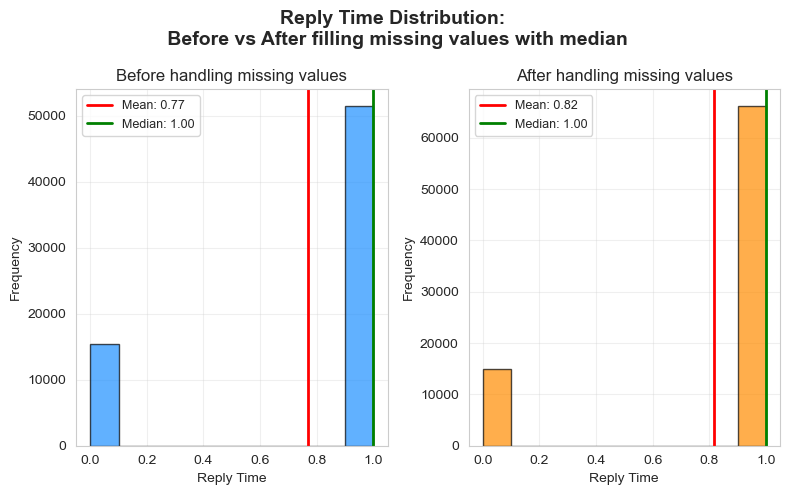

In [978]:
# Extract reply time data
original_reply = airbnb['reply time'].dropna()  # Original with NaN removed
imputed_reply = df['reply time']  # Imputed data

# Calculate statistics
mean_original = original_reply.mean()
median_original = original_reply.median()
std_original = original_reply.std()

mean_imputed = imputed_reply.mean()
median_imputed = imputed_reply.median()
std_imputed = imputed_reply.std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

# Common settings
bins = 10
alpha = 0.7

# 1. Original Reply Time
ax1.hist(original_reply, bins=bins, alpha=alpha, color='dodgerblue', edgecolor='black')
ax1.set_xlabel('Reply Time')
ax1.set_ylabel('Frequency')
ax1.set_title('Before handling missing values')

# Add statistical lines
ax1.axvline(mean_original, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_original:.2f}')
ax1.axvline(median_original, color='green', linestyle='-', linewidth=2, label=f'Median: {median_original:.2f}')

ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Imputed Reply Time  
ax2.hist(imputed_reply, bins=bins, alpha=alpha, color='darkorange', edgecolor='black')
ax2.set_xlabel('Reply Time')
ax2.set_ylabel('Frequency')
ax2.set_title('After handling missing values')

# Add statistical lines
ax2.axvline(mean_imputed, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_imputed:.2f}')
ax2.axvline(median_imputed, color='green', linestyle='-', linewidth=2, label=f'Median: {median_imputed:.2f}')

ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.suptitle('Reply Time Distribution: \n Before vs After filling missing values with median', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [979]:
print("=" * 65)
print("DATA CLEANING IMPACT SUMMARY")
print("=" * 65)
print(f"{'Metric':<25} {'Before':<15} {'After':<15} {'Change':<10}")
print("-" * 65)
print(f"{'Price - Mean':<25} ${original_prices.mean():<14,.0f} ${imputed_prices.mean():<14,.0f} {((imputed_prices.mean()-original_prices.mean())/original_prices.mean()*100):+.1f}%")
print(f"{'Price - Median':<25} ${original_prices.median():<14,.0f} ${imputed_prices.median():<14,.0f} {((imputed_prices.median()-original_prices.median())/original_prices.median()*100):+.1f}%")
print(f"{'Price - Missing':<25} {airbnb['price'].isna().mean()*100:<14.1f}% 0.0%{' ' * 10}-100.0%")
print(f"{'Reply Time - Mean':<25} {original_reply.mean():<14.3f} {imputed_reply.mean():<14.3f} {((imputed_reply.mean()-original_reply.mean())/original_reply.mean()*100):+.1f}%")
print(f"{'Reply Time - Missing':<25} {airbnb['reply time'].isna().mean()*100:<14.1f}% 0.0%{' ' * 10}-100.0%")
print(f"{'Total Complete Rows':<25} {len(airbnb):<14,} {len(df):<14,} {((len(df)-len(airbnb))/len(airbnb)*100):+.1f}%")
print("=" * 65)

DATA CLEANING IMPACT SUMMARY
Metric                    Before          After           Change    
-----------------------------------------------------------------
Price - Mean              $238            $207            -12.8%
Price - Median            $151            $140            -7.3%
Price - Missing           6.3           % 0.0%          -100.0%
Reply Time - Mean         0.770          0.816          +6.0%
Reply Time - Missing      22.4          % 0.0%          -100.0%
Total Complete Rows       86,186         81,042         -6.0%


In [980]:
df.isnull().sum()

host_id                      0
city                         0
price                        0
reply time                   0
guest favourite              0
room_type                    0
host total listings count    0
total reviewers number       0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
host response rate           0
host acceptance rate         0
area                         0
dtype: int64

No More missing data

In [981]:
airbnb['reply time'].describe()

count    66867.000000
mean         0.769857
std          0.420928
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reply time, dtype: float64

In [982]:
df['reply time'].describe()

count    81042.000000
mean         0.816132
std          0.387379
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reply time, dtype: float64

In [983]:
print(df.columns.tolist())

['host_id', 'city', 'price', 'reply time', 'guest favourite', 'room_type', 'host total listings count', 'total reviewers number', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'host response rate', 'host acceptance rate', 'area']


In [984]:
df.drop(columns=['host since'], inplace=True)
df.info()

KeyError: "['host since'] not found in axis"

In [985]:
# Step 3.2: Convert grouping columns to consistent data types
print("\n=== CONVERTING DATA TYPES ===")
# 1. Convert comma to dot before numeric conversion
df['bathrooms'] = airbnb['bathrooms'].str.replace(',', '.', regex=False)

# 2. Convert to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')


for col in ['host response rate', 'host acceptance rate']:
    df[col] = df[col].str.replace(',', '.')  # Replace comma with dot
    df[col] = df[col].str.rstrip('%').astype(float) / 100

# Ensure area is string (categorical)
df['area'] = df['area'].astype(str)

print(df.dtypes)


=== CONVERTING DATA TYPES ===


AttributeError: Can only use .str accessor with string values!

In [986]:
df['area'].value_counts()

area
North America    34599
Asia             23242
Europe           23201
Name: count, dtype: int64

In [987]:
df[['price', 'reply time', 'bathrooms']].describe()

,price,reply time,bathrooms
count,81042.000000,81042.000000,81042.000000
mean,200.605951,0.816132,1.100713
std,197.616996,0.387379,0.774707
min,9.000000,0.000000,0.000000
25%,86.000000,1.000000,1.000000
50%,148.000000,1.000000,1.000000
75%,243.000000,1.000000,1.000000
max,1296.450000,1.000000,20.000000


In [988]:
# Save cleaned dataset to CSV without performed capping
output_file = 'Airbnb_nocap_price.csv'
df.to_csv(output_file, index=False)

In [989]:
# Use 99th percentile as upper cap (removes extreme outliers but keeps high-end listings)
price_99th = df['price'].quantile(0.99)
print(f"99th percentile: ${price_99th:.2f}")

99th percentile: $1296.45


In [990]:
# Cap price at 99th percentile ($1296.45)
df['price'] = df['price'].clip(upper=price_99th)

In [991]:
df['price'].describe()

count    81042.000000
mean       200.605951
std        197.616996
min          9.000000
25%         86.000000
50%        148.000000
75%        243.000000
max       1296.450000
Name: price, dtype: float64

TypeError: '<=' not supported between instances of 'str' and 'int'

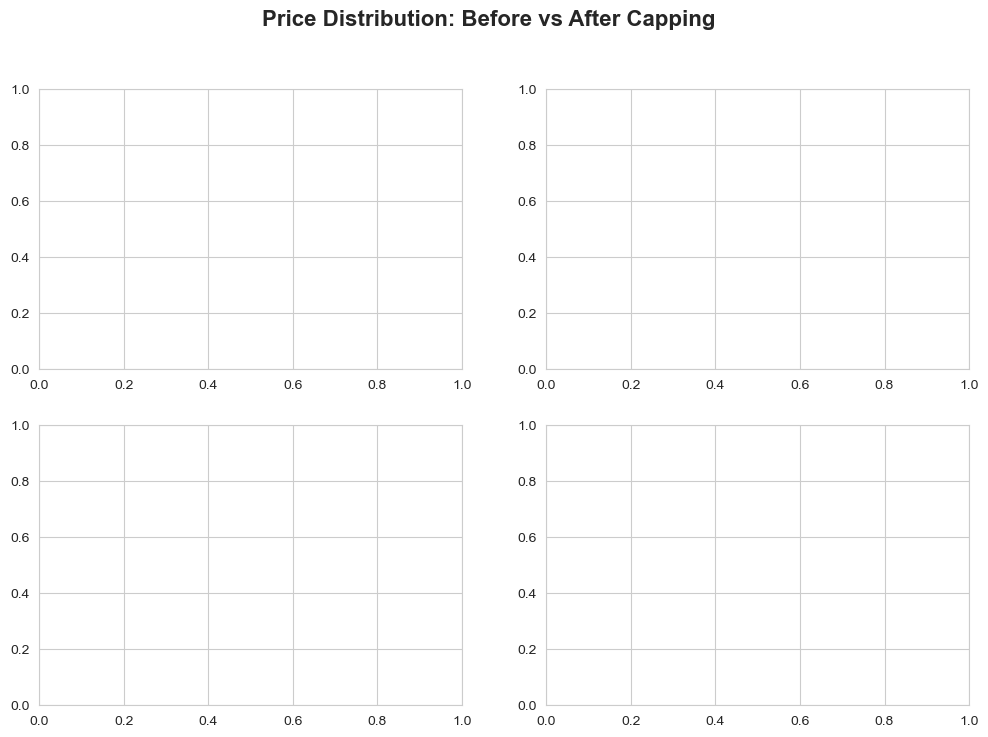

In [992]:
price_before = airbnb['price'].copy()
price_after = df['price'].copy()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Price Distribution: Before vs After Capping', fontsize=16, fontweight='bold')

# 1. Box plot with better scaling
bp = axes[0, 0].boxplot([price_before[price_before <= 5000], price_after], 
                       tick_labels=['Before\n(≤ $5k)', 'After'])
axes[0, 0].set_title('Box Plot (Clipped at $5k for visibility)')
axes[0, 0].set_ylabel('Price ($)')

# 2. Log-scale histogram before
axes[0, 1].hist(price_before, bins=50, alpha=0.7, color='red', edgecolor='black', log=True)
axes[0, 1].axvline(price_before.quantile(0.99), color='black', linestyle='--', label='99th: $1,296')
axes[0, 1].set_title('Before Capping (Log Scale)')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Log Frequency')
axes[0, 1].legend()

# 3. Histogram after (normal scale)
axes[1, 0].hist(price_after, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(price_after.max(), color='black', linestyle='--', label=f'Max: ${price_after.max():.0f}')
axes[1, 0].set_title('Before and After Capping')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Violin plot for better distribution comparison
violin_data = [price_before[price_before <= 2000], price_after]
violin = axes[1, 1].violinplot(violin_data, showmeans=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Before\n(≤ $2k)', 'After'])
axes[1, 1].set_title('Violin Plot Comparison \n before and after capping')
axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Show outliers impact
print("Outlier Analysis:")
print("="*50)
print(f"Listings > $1,296 (99th percentile): {len(price_before[price_before > 1296.45]):,}")
print(f"Listings > $5,000: {len(price_before[price_before > 5000]):,}")
print(f"Listings > $10,000: {len(price_before[price_before > 10000]):,}")
print(f"Maximum price before: ${price_before.max():,.2f}")
print(f"Maximum price after: ${price_after.max():,.2f}")

In [993]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [994]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [995]:
# Skewness check
from scipy.stats import skew
print("\nSkewness:")
for col in ['price', 'accommodates', 'bedrooms', 'bathrooms']:
    print(f"{col}: {skew(df[col].dropna()):.2f}")


Skewness:
price: 3.06
accommodates: 1.98
bedrooms: 1.84
bathrooms: 2.57


In [996]:
df['bathrooms'].describe()

count    81042.000000
mean         1.100713
std          0.774707
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: bathrooms, dtype: float64

In [997]:
print(df['bathrooms'].isnull().sum())

0


In [998]:
# Use 99.5th percentile as upper cap (removes extreme outliers but keeps high-end listings)
bathrooms_99th = df['bathrooms'].quantile(0.995)
print(f"99th percentile for bathrooms: {bathrooms_99th:.2f}")

99th percentile for bathrooms: 4.50


In [999]:
# Cap bathrooms at 4 (covers 99.5% of realistic listings)
df['bathrooms'] = df['bathrooms'].clip(upper=bathrooms_99th)

In [1000]:
df['bedrooms'].describe()

count    81042.000000
mean         1.272525
std          1.104743
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: bedrooms, dtype: float64

In [1001]:
# Use 99.5th percentile as upper cap (removes extreme outliers but keeps high-end listings)
bedrooms_99th = df['bedrooms'].quantile(0.995)
print(f"99th percentile for bedrooms: {bedrooms_99th:.2f}")

99th percentile for bedrooms: 5.00


In [1002]:
# Cap bathrooms at 4 (covers 99.5% of realistic listings)
df['bedrooms'] = df['bedrooms'].clip(upper=bedrooms_99th)

In [1003]:
df['bedrooms'].describe()

count    81042.000000
mean         1.263801
std          1.058203
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: bedrooms, dtype: float64

In [1004]:
df['accommodates'].describe()

count    81042.000000
mean         3.493904
std          2.413135
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [1005]:
# Use 99th percentile as upper cap (removes extreme outliers but keeps high-end listings)
accommodates_99th = df['accommodates'].quantile(0.99)
print(f"99th percentile for bathrooms: {accommodates_99th:.2f}")

99th percentile for bathrooms: 12.00


In [1006]:
# Cap accommodates at (covers 99% of realistic listings)
df['accommodates'] = df['accommodates'].clip(upper=accommodates_99th)

In [1007]:
df['accommodates'].describe()

count    81042.000000
mean         3.464956
std          2.286597
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: accommodates, dtype: float64

In [1008]:
df.columns

Index(['host_id', 'city', 'price', 'reply time', 'guest favourite',
       'room_type', 'host total listings count', 'total reviewers number',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'host response rate',
       'host acceptance rate', 'area'],
      dtype='object')

In [1009]:
print("\nSkewness:")
for col in ['price', 'accommodates', 'bedrooms', 'bathrooms']:
    print(f"{col}: {skew(df[col].dropna()):.2f}")


Skewness:
price: 3.06
accommodates: 1.59
bedrooms: 1.24
bathrooms: 1.21


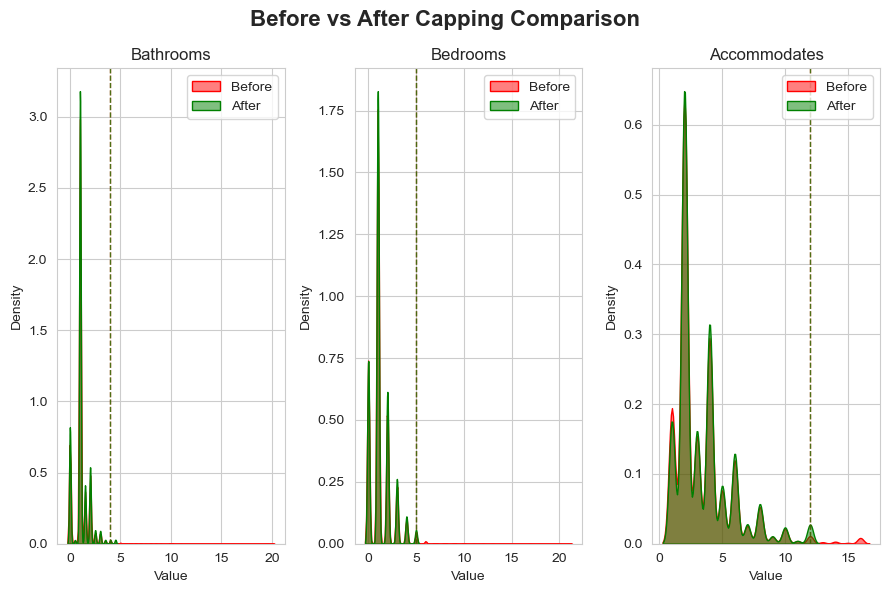

In [1010]:
# Get original and cleaned data
original = airbnb[['bathrooms', 'bedrooms', 'accommodates']].copy()
cleaned = df[['bathrooms', 'bedrooms', 'accommodates']].copy()

# Convert original bathrooms (handle comma decimals)
original['bathrooms'] = pd.to_numeric(
    original['bathrooms'].str.replace(',', '.', regex=False), 
    errors='coerce'
)
columns = ['bathrooms', 'bedrooms', 'accommodates']
titles = ['Bathrooms', 'Bedrooms', 'Accommodates']
# Create figure
fig, axes = plt.subplots(1, 3, figsize=(9, 6))
fig.suptitle('Before vs After Capping Comparison', fontsize=16, fontweight='bold')

for i, col in enumerate(columns):
    # Plot densities
    sns.kdeplot(original[col].dropna(), ax=axes[i], label='Before', 
                fill=True, alpha=0.5, color='red')
    sns.kdeplot(cleaned[col], ax=axes[i], label='After', 
                fill=True, alpha=0.5, color='green')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Value')
    axes[i].legend()
    
    # Add vertical lines for percentiles
    axes[i].axvline(original[col].quantile(0.99), color='red', 
                   linestyle='--', alpha=0.7, linewidth=1)
    axes[i].axvline(cleaned[col].quantile(0.99), color='green', 
                   linestyle='--', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

UNi-Variate Analysis

In [1011]:
print(df['guest favourite'].value_counts())

guest favourite
0    57909
1    23133
Name: count, dtype: int64


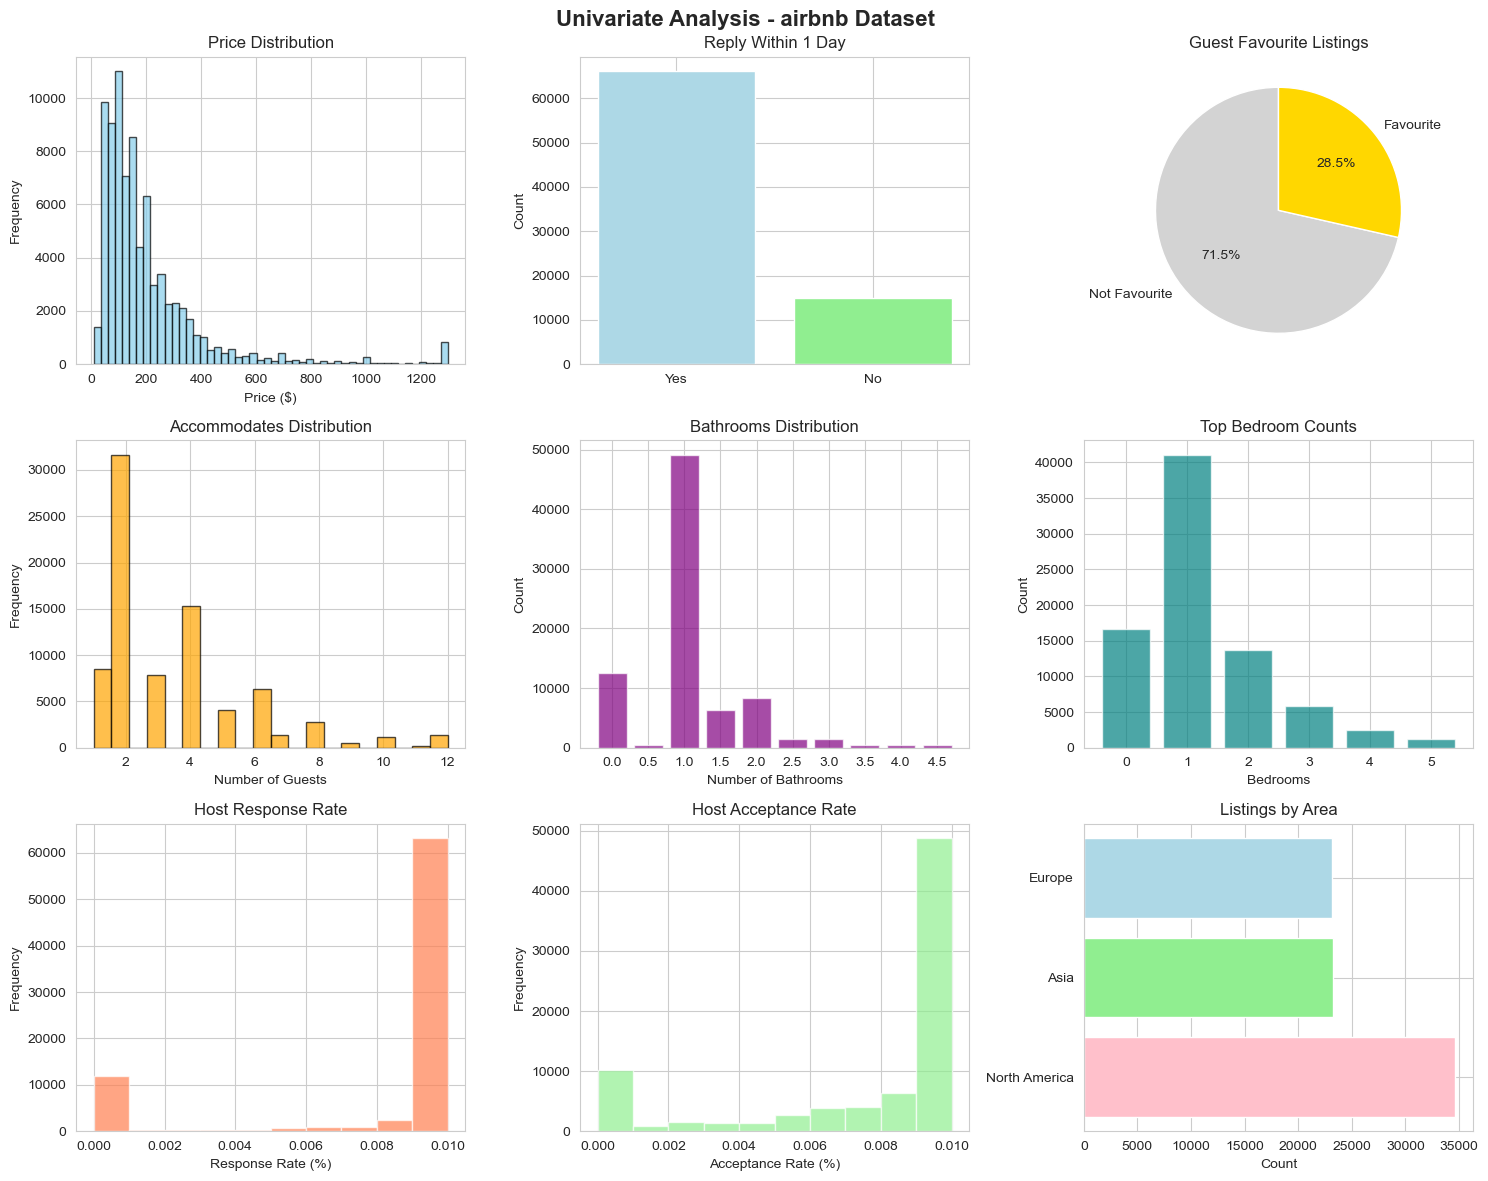

In [1012]:

# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis - airbnb Dataset', fontsize=16, fontweight='bold')

# Set pastel color palette
pastel_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF']  # Pastel red, green, blue

# 1. Price distribution
axes[0,0].hist(df['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# 2. Reply time (binary)
reply_counts = df['reply time'].value_counts()
axes[0,1].bar(['Yes', 'No'], reply_counts, color=['lightblue', 'lightgreen'])
axes[0,1].set_title('Reply Within 1 Day')
axes[0,1].set_ylabel('Count')

# 3. Guest favourite
fav_counts = df['guest favourite'].value_counts()
axes[0,2].pie(fav_counts, labels=['Not Favourite', 'Favourite'], autopct='%1.1f%%',
              colors=['lightgray', 'gold'], startangle=90)
axes[0,2].set_title('Guest Favourite Listings')

# 4. Accommodates
axes[1,0].hist(df['accommodates'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Accommodates Distribution')
axes[1,0].set_xlabel('Number of Guests')
axes[1,0].set_ylabel('Frequency')

# 5. Bathrooms
bath_counts = df['bathrooms'].value_counts().sort_index()
axes[1,1].bar(bath_counts.index.astype(str), bath_counts.values, color='purple', alpha=0.7)
axes[1,1].set_title('Bathrooms Distribution')
axes[1,1].set_xlabel('Number of Bathrooms')
axes[1,1].set_ylabel('Count')

# 6. Bedrooms
bed_counts = df['bedrooms'].value_counts().sort_index().head(10)
axes[1,2].bar(bed_counts.index.astype(str), bed_counts.values, color='teal', alpha=0.7)
axes[1,2].set_title('Top Bedroom Counts')
axes[1,2].set_xlabel('Bedrooms')
axes[1,2].set_ylabel('Count')

# 7. Host response rate
axes[2,0].hist(df['host response rate'], bins=10, color='coral', alpha=0.7)
axes[2,0].set_title('Host Response Rate')
axes[2,0].set_xlabel('Response Rate (%)')
axes[2,0].set_ylabel('Frequency')

# 8. Host acceptance rate
axes[2,1].hist(df['host acceptance rate'], bins=10, color='lightgreen', alpha=0.7)
axes[2,1].set_title('Host Acceptance Rate')
axes[2,1].set_xlabel('Acceptance Rate (%)')
axes[2,1].set_ylabel('Frequency')

# 9. Area distribution
area_counts = df['area'].value_counts()
axes[2,2].barh(area_counts.index, area_counts.values, color=['pink', 'lightgreen', 'lightblue'])
axes[2,2].set_title('Listings by Area')
axes[2,2].set_xlabel('Count')

plt.tight_layout()
plt.show()



In [1013]:
# Additional univariate stats
print("="*50)
print("KEY STATISTICS:")
print("="*50)
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Median price: ${df['price'].median():.2f}")
print(f"Reply rate within 1 day: {(df['reply time'].mean()*100):.1f}%")
print(f"Guest favourite listings: {(df['guest favourite'].mean()*100):.1f}%")
print(f"Average accommodates: {df['accommodates'].mean():.1f}")
print(f"Most common area: {df['area'].mode()[0]} ({area_counts.max():,} listings)")

KEY STATISTICS:
Average price: $200.61
Median price: $148.00
Reply rate within 1 day: 81.6%
Guest favourite listings: 28.5%
Average accommodates: 3.5
Most common area: North America (34,599 listings)


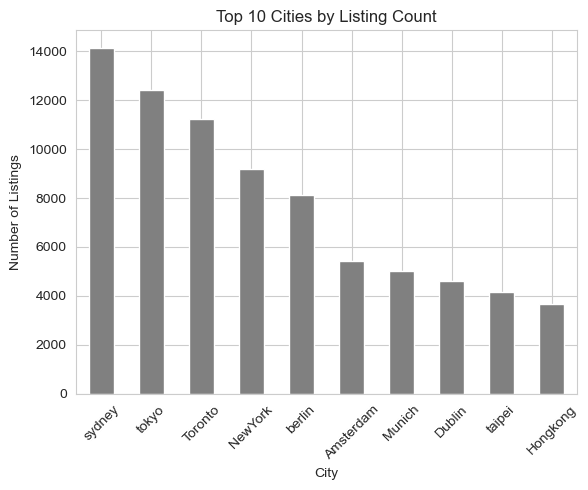

In [1014]:
# Top 10 cities
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(6, 5))
top_cities.plot(kind='bar', color='grey')
plt.title('Top 10 Cities by Listing Count')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


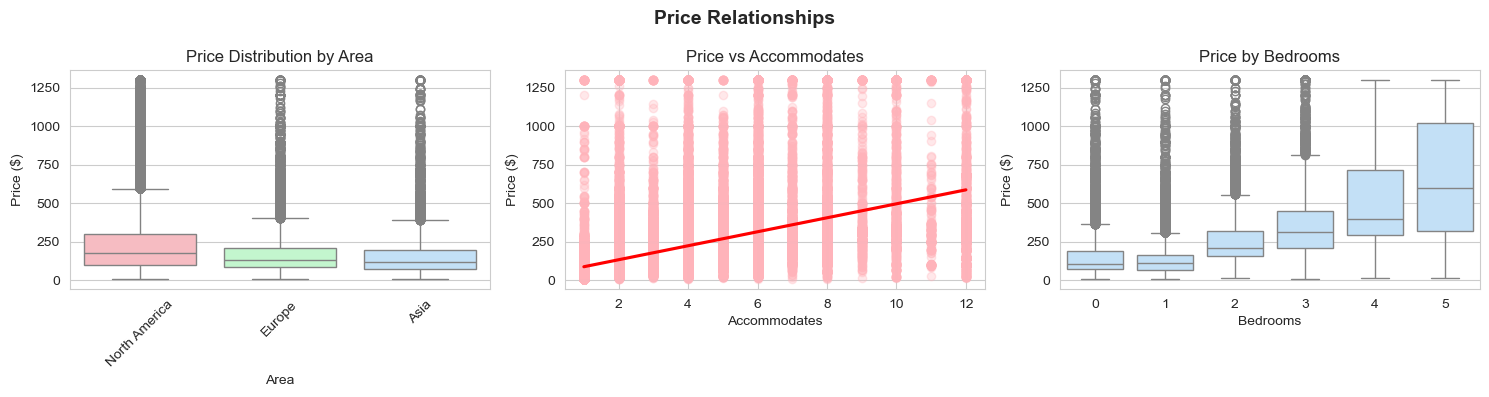

In [1015]:
# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Price Relationships', fontsize=14, fontweight='bold')

# 1. Price vs Area
sns.boxplot(data=df, x='area', y='price', hue='area', legend=False,
            palette=['#FFB3BA', '#BAFFC9', '#BAE1FF'], ax=axes[0])
axes[0].set_title('Price Distribution by Area')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Price ($)')
axes[0].tick_params(axis='x', rotation=45)

# 2. Price vs Accommodates
sns.regplot(data=df, x='accommodates', y='price', ax=axes[1],
            scatter_kws={'alpha':0.3, 'color':'#FFB3BA'},
            line_kws={'color':'red'})
axes[1].set_title('Price vs Accommodates')
axes[1].set_xlabel('Accommodates')
axes[1].set_ylabel('Price ($)')

# 3. Price vs Bedrooms
sns.boxplot(data=df, x='bedrooms', y='price', ax=axes[2],
            color='#BAE1FF')
axes[2].set_title('Price by Bedrooms')
axes[2].set_xlabel('Bedrooms')
axes[2].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

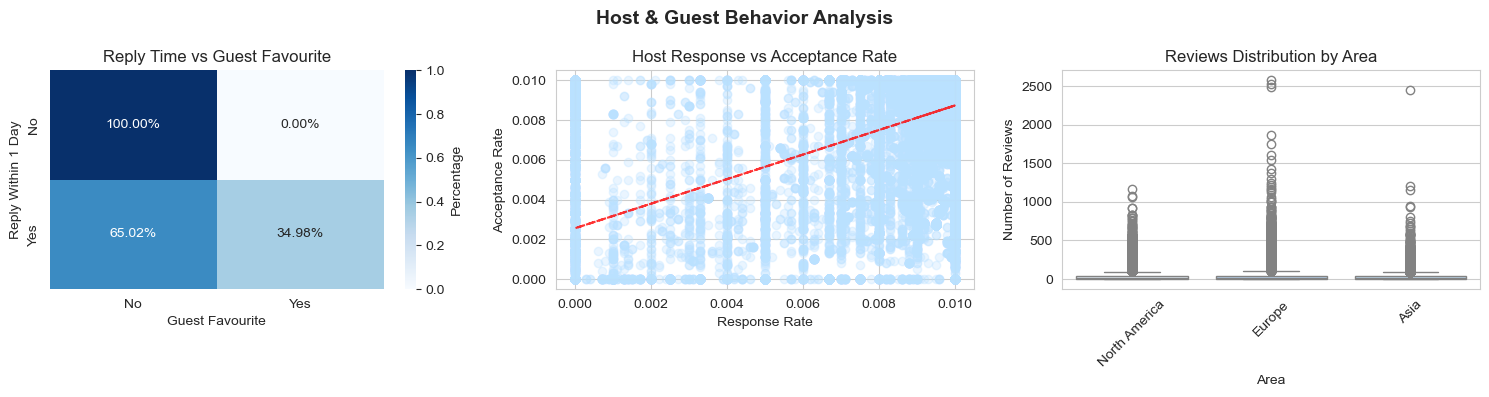

In [1016]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Host & Guest Behavior Analysis', fontsize=14, fontweight='bold')

# 1. Reply Time vs Guest Favourite
cross_tab = pd.crosstab(df['reply time'], df['guest favourite'], normalize='index')
sns.heatmap(cross_tab, annot=True, fmt='.2%', cmap='Blues',
            ax=axes[0], cbar_kws={'label': 'Percentage'})
axes[0].set_title('Reply Time vs Guest Favourite')
axes[0].set_xlabel('Guest Favourite')
axes[0].set_ylabel('Reply Within 1 Day')
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_yticklabels(['No', 'Yes'])

# 2. Host Response vs Acceptance Rate
axes[1].scatter(df['host response rate'], df['host acceptance rate'],
                alpha=0.3, color='#BAE1FF')
axes[1].set_title('Host Response vs Acceptance Rate')
axes[1].set_xlabel('Response Rate')
axes[1].set_ylabel('Acceptance Rate')
# Add correlation line
z = np.polyfit(df['host response rate'], df['host acceptance rate'], 1)
p = np.poly1d(z)
axes[1].plot(df['host response rate'], p(df['host response rate']),
             "r--", alpha=0.8)

# 3. Reviews by Area
sns.boxplot(data=df, x='area', y='total reviewers number', hue='area',
            legend=False, palette = ['#E6F3FF', '#B3D9FF', '#BAE1FF'],
            ax=axes[2])
axes[2].set_title('Reviews Distribution by Area')
axes[2].set_xlabel('Area')
axes[2].set_ylabel('Number of Reviews')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

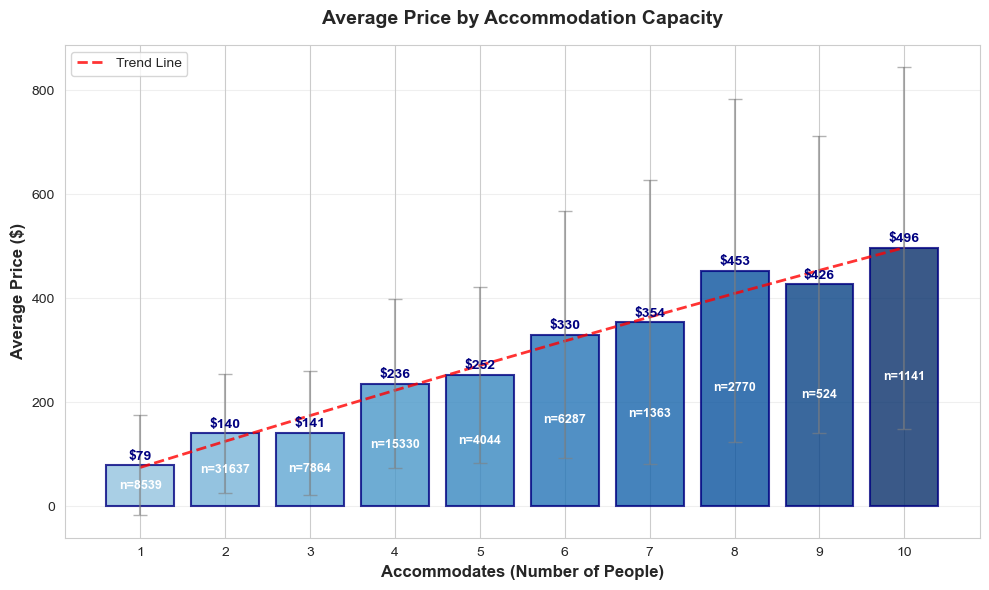

In [1017]:

# Calculate average price by accommodates
avg_price_by_accommodates = df.groupby('accommodates')['price'].agg(['mean', 'count', 'std']).reset_index()
avg_price_by_accommodates.columns = ['accommodates', 'avg_price', 'count', 'std_dev']

# Filter for reasonable accommodation sizes (1-10 people)
avg_price_by_accommodates = avg_price_by_accommodates[avg_price_by_accommodates['accommodates'].between(1, 10)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar chart with blue gradient
# Calculate color intensity based on average price
min_price = avg_price_by_accommodates['avg_price'].min()
max_price = avg_price_by_accommodates['avg_price'].max()

# Create blue gradient colors
colors = plt.cm.Blues(np.linspace(0.4, 1, len(avg_price_by_accommodates)))

# Plot bars
bars = ax.bar(avg_price_by_accommodates['accommodates'].astype(str), 
              avg_price_by_accommodates['avg_price'],
              color=colors,
              edgecolor='navy',
              linewidth=1.5,
              alpha=0.8)

# Formatting
ax.set_title('Average Price by Accommodation Capacity', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Accommodates (Number of People)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Price ($)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, avg_price, count in zip(bars, avg_price_by_accommodates['avg_price'], avg_price_by_accommodates['count']):
    height = bar.get_height()
    # Price label on top
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${avg_price:.0f}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold', color='navy')
    # Count label inside bar
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'n={count}', ha='center', va='center', 
            fontsize=9, fontweight='bold', color='white')

# Add trend line
x_positions = np.arange(len(avg_price_by_accommodates))
z = np.polyfit(x_positions, avg_price_by_accommodates['avg_price'], 2)
p = np.poly1d(z)
ax.plot(x_positions, p(x_positions), 'r--', linewidth=2, alpha=0.8, label='Trend Line')

# Add error bars (standard deviation)
ax.errorbar(x_positions, avg_price_by_accommodates['avg_price'], 
            yerr=avg_price_by_accommodates['std_dev'],
            fmt='none', ecolor='gray', alpha=0.6, capsize=5)

ax.legend()

plt.tight_layout()
plt.show()

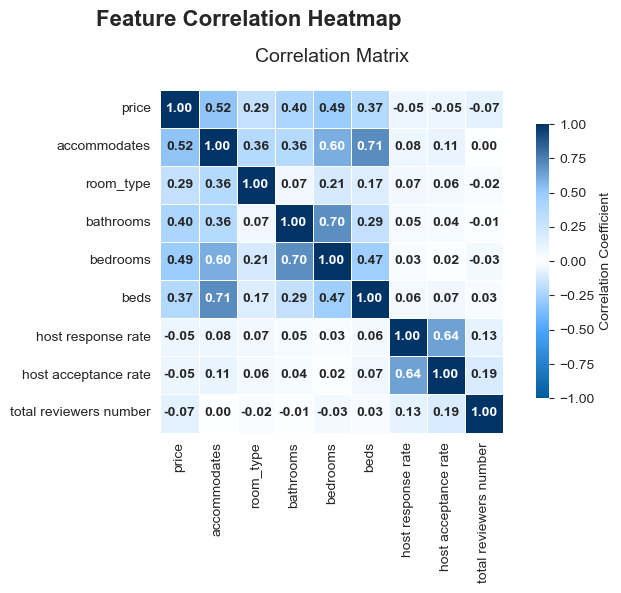

In [1018]:

from matplotlib.colors import LinearSegmentedColormap

# Correlation Heatmap with blues
corr_cols = ['price', 'accommodates', 'room_type','bathrooms', 'bedrooms', 'beds',
             'host response rate', 'host acceptance rate', 'total reviewers number']
corr_matrix = df[corr_cols].corr()

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle('Feature Correlation Heatmap', fontsize=16, fontweight='bold')

# Two-tone blues for negative/positive correlations
# Colors should be in gradient order from negative to positive
two_tone_blues = ['#005C99', '#4DA6FF', '#FFFFFF', '#99CCFF', '#003366']


two_tone_cmap = LinearSegmentedColormap.from_list("two_tone_blues", two_tone_blues)

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=two_tone_cmap,
            center=0, ax=ax, square=True, vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            linewidths=0.5, linecolor='white')

ax.set_title('Correlation Matrix', fontsize=14, pad=20)

# Color annotations based on background
for text in ax.texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()

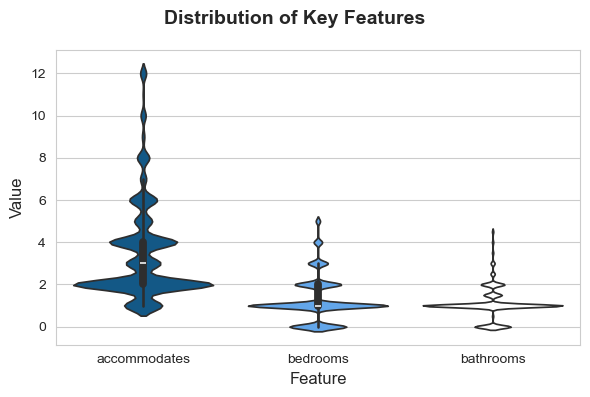

In [1019]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
fig.suptitle('Distribution of Key Features', fontsize=14, fontweight='bold')

# Create a combined violin plot 
plot_data = pd.melt(df[['price', 'accommodates', 'bedrooms', 'bathrooms']], 
                    value_vars=['accommodates', 'bedrooms', 'bathrooms'],
                    var_name='feature', value_name='value')
sns.violinplot(data=plot_data, x='feature', y='value', hue='feature',
               legend=False, palette=['#005C99', '#4DA6FF', '#FFFFFF'], ax=ax)
ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()

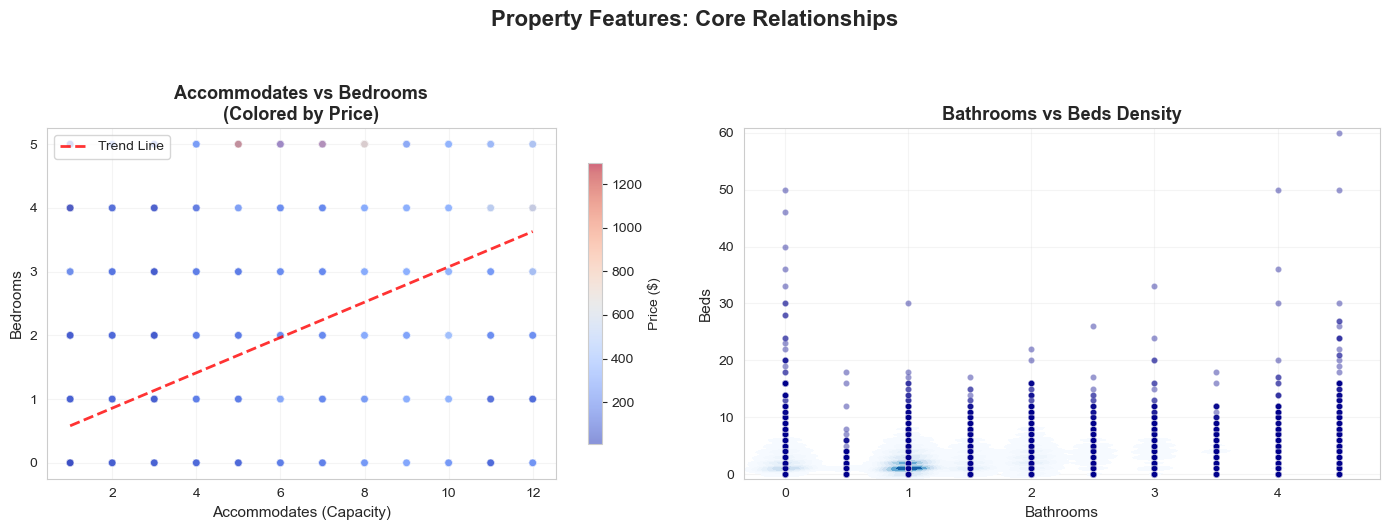

In [1020]:


# Figure 1: Main scatter plot with trend (2 graphs instead of 3)
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig1.suptitle('Property Features: Core Relationships', fontsize=16, fontweight='bold', y=1.05)

# 1. Accommodates vs Bedrooms (colored by Price)
scatter1 = ax1.scatter(df['accommodates'], df['bedrooms'], 
                      c=df['price'], cmap='coolwarm', alpha=0.6, s=30, 
                      edgecolors='white', linewidth=0.5)

# Add trend line
z = np.polyfit(df['accommodates'], df['bedrooms'], 1)
p = np.poly1d(z)
ax1.plot(df['accommodates'].sort_values(), p(df['accommodates'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')

ax1.set_title('Accommodates vs Bedrooms\n(Colored by Price)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Accommodates (Capacity)', fontsize=11)
ax1.set_ylabel('Bedrooms', fontsize=11)
ax1.grid(True, alpha=0.2)
plt.colorbar(scatter1, ax=ax1, label='Price ($)', shrink=0.8)
ax1.legend(loc='upper left')

# 2. Density plot: Bathrooms vs Beds
sns.kdeplot(data=df, x='bathrooms', y='beds', cmap='Blues', fill=True, ax=ax2)
sns.scatterplot(data=df, x='bathrooms', y='beds', 
                alpha=0.4, s=20, color='darkblue', ax=ax2)
ax2.set_title('Bathrooms vs Beds Density', fontsize=13, fontweight='bold')
ax2.set_xlabel('Bathrooms', fontsize=11)
ax2.set_ylabel('Beds', fontsize=11)
ax2.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

/var/folders/6w/rkqvbjtx04s93768hcryddtc0000gn/T/ipykernel_6278/1542717577.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bedroom_data, x='bedrooms', y='price',


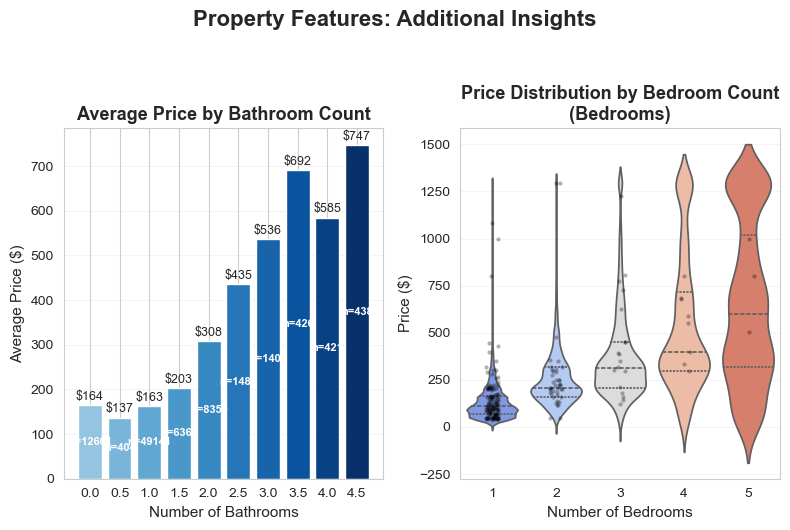

In [1021]:
# Figure 2: Additional insights
fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(8, 5))
fig2.suptitle('Property Features: Additional Insights', fontsize=16, fontweight='bold', y=1.05)

# 4. Bar chart: Average Price by Bathroom Count
avg_price_by_bathrooms = df.groupby('bathrooms')['price'].agg(['mean', 'count']).reset_index()
# Filter for reasonable bathroom counts
avg_price_by_bathrooms = avg_price_by_bathrooms[avg_price_by_bathrooms['bathrooms'] <= 4.5]

bars = ax4.bar(avg_price_by_bathrooms['bathrooms'].astype(str), 
               avg_price_by_bathrooms['mean'],
               color=plt.cm.Blues(np.linspace(0.4, 1, len(avg_price_by_bathrooms))))
ax4.set_title('Average Price by Bathroom Count', fontsize=13, fontweight='bold')
ax4.set_xlabel('Number of Bathrooms', fontsize=11)
ax4.set_ylabel('Average Price ($)', fontsize=11)
ax4.grid(True, alpha=0.2, axis='y')

# Add value labels on bars
for i, (bar, row) in enumerate(zip(bars, avg_price_by_bathrooms.itertuples())):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.0f}', ha='center', va='bottom', fontsize=9)
    # Add count as secondary annotation
    ax4.text(bar.get_x() + bar.get_width()/2., height/2,
             f'n={row.count}', ha='center', va='center', fontsize=8, 
             color='white', fontweight='bold')

# 5. Violin plot: Price distribution by Bedroom count
bedroom_data = df[df['bedrooms'].between(1, 5)]  # Filter for common bedroom counts

sns.violinplot(data=bedroom_data, x='bedrooms', y='price',
               palette='coolwarm', inner='quartile', ax=ax5)
sns.stripplot(data=bedroom_data.sample(min(200, len(bedroom_data))), 
              x='bedrooms', y='price', color='black', alpha=0.3, size=3, ax=ax5)

ax5.set_title('Price Distribution by Bedroom Count\n(Bedrooms)', fontsize=13, fontweight='bold')
ax5.set_xlabel('Number of Bedrooms', fontsize=11)
ax5.set_ylabel('Price ($)', fontsize=11)
ax5.grid(True, alpha=0.2, axis='y')

plt.tight_layout()
plt.show()

In [1022]:
df['bathrooms'].describe()

count    81042.000000
mean         1.094149
std          0.725859
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.500000
Name: bathrooms, dtype: float64

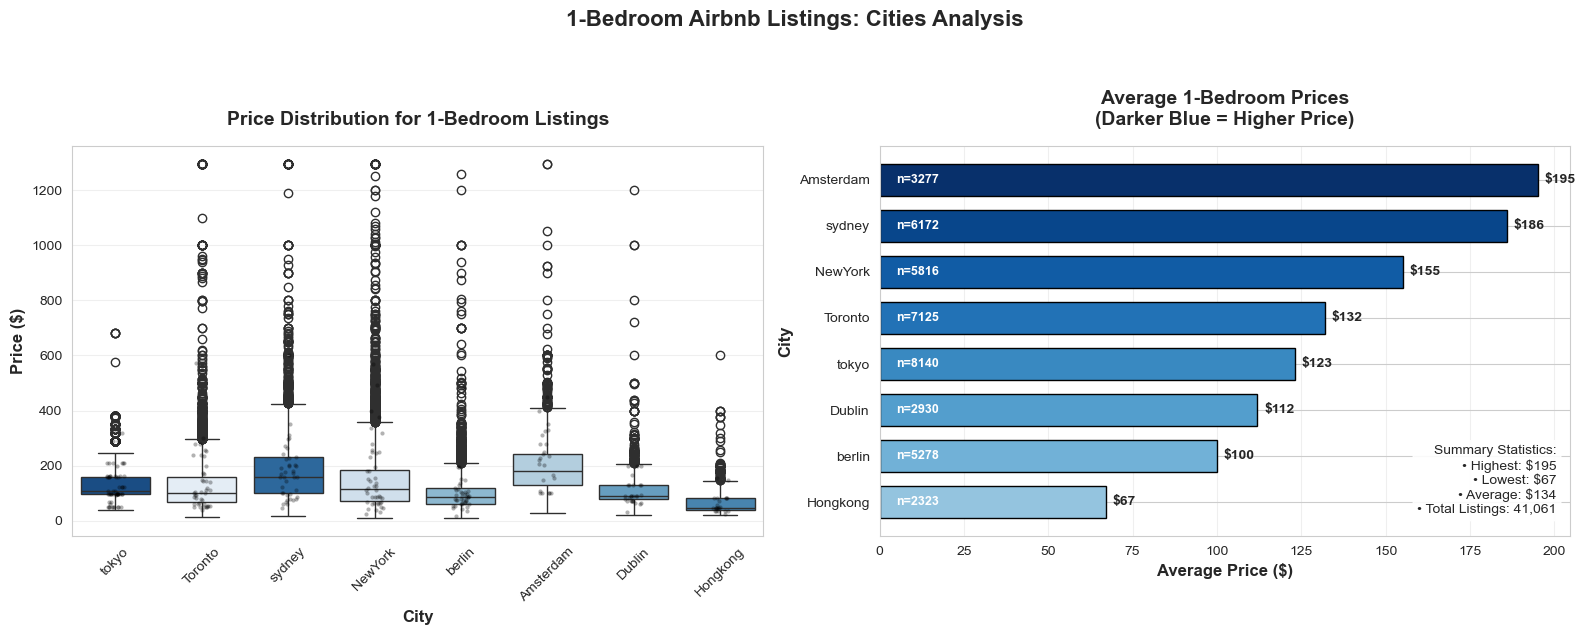

In [1023]:

# Filter for 1-bedroom listings
df_1bed = df[df['bedrooms'] == 1]

# Get top 10 cities by number of 1-bedroom listings
top_cities_1bed = df_1bed['city'].value_counts().index.tolist()
df_top = df_1bed[df_1bed['city'].isin(top_cities_1bed)]

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('1-Bedroom Airbnb Listings: Cities Analysis', 
             fontsize=16, fontweight='bold', y=1.05)

# 1. Left: Box plot for price distribution
sns.boxplot(data=df_top, x='city', y='price', hue='city',
            order=top_cities_1bed, palette='Blues',
            ax=ax1, legend=False)

ax1.set_title('Price Distribution for 1-Bedroom Listings', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('City', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add scatter points for individual listings
sns.stripplot(data=df_top.sample(min(300, len(df_top)), random_state=42),
              x='city', y='price', color='black', alpha=0.3, size=3,
              jitter=True, ax=ax1)

# 2. Right: Bar chart for average prices
avg_price_by_city = df_top.groupby('city')['price'].agg(['mean', 'count']).round(0)
avg_price_by_city = avg_price_by_city.loc[top_cities_1bed]  # Maintain order
avg_price_by_city.columns = ['avg_price', 'listing_count']

# Sort by average price for better visualization
avg_price_by_city = avg_price_by_city.sort_values('avg_price', ascending=True)

# Create horizontal bar chart
y_pos = np.arange(len(avg_price_by_city))
colors = plt.cm.Blues(np.linspace(0.4, 1, len(avg_price_by_city)))

bars = ax2.barh(y_pos, avg_price_by_city['avg_price'], color=colors,
                edgecolor='black', linewidth=1, height=0.7)

ax2.set_title('Average 1-Bedroom Prices\n(Darker Blue = Higher Price)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Average Price ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('City', fontsize=12, fontweight='bold')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(avg_price_by_city.index)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels to bars
for bar, price, count in zip(bars, avg_price_by_city['avg_price'], avg_price_by_city['listing_count']):
    width = bar.get_width()
    # Price label
    ax2.text(width + max(avg_price_by_city['avg_price']) * 0.01, 
             bar.get_y() + bar.get_height()/2,
             f'${price:.0f}', ha='left', va='center', 
             fontsize=10, fontweight='bold')
    # Count label at the beginning of bar
    ax2.text(5, bar.get_y() + bar.get_height()/2,
             f'n={count}', ha='left', va='center', 
             fontsize=9, fontweight='bold', color='white')

# Add summary statistics
max_price = avg_price_by_city['avg_price'].max()
min_price = avg_price_by_city['avg_price'].min()
avg_price = avg_price_by_city['avg_price'].mean()
total_listings = avg_price_by_city['listing_count'].sum()

summary_text = f"""Summary Statistics:
• Highest: ${max_price:.0f}
• Lowest: ${min_price:.0f}
• Average: ${avg_price:.0f}
• Total Listings: {total_listings:,}"""

ax2.text(0.98, 0.05, summary_text, transform=ax2.transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

In [1024]:
# Save the fully cleaned dataset to CSV
output_filename = 'airbnb_data_cleaned.csv'
df.to_csv(output_filename, index=False)

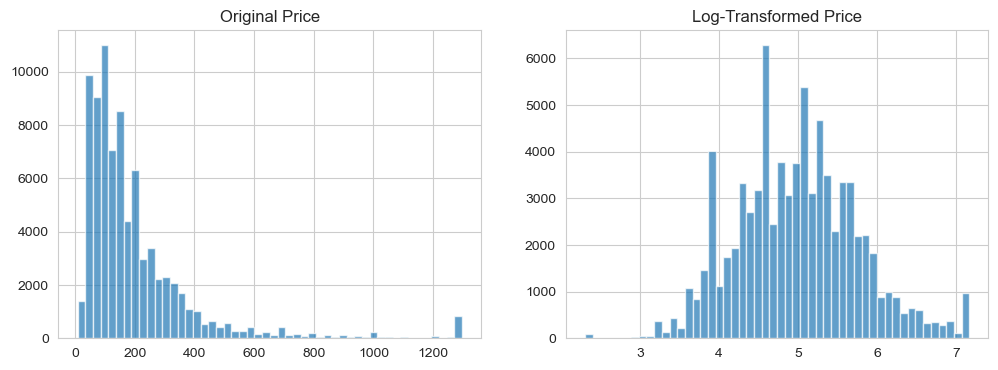

In [1025]:
# Apply log transform to handle skewness
df['price_log'] = np.log1p(df['price'])

# Compare distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, alpha=0.7)
plt.title('Original Price')

plt.subplot(1, 2, 2)
plt.hist(df['price_log'], bins=50, alpha=0.7)
plt.title('Log-Transformed Price')
plt.show()

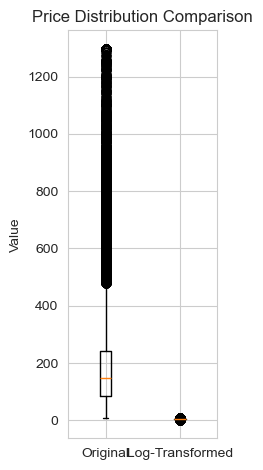

In [1026]:
# Boxplot comparison

plt.subplot(1, 3, 3)
box_plot = plt.boxplot([df['price'], df['price_log']])
plt.xticks([1, 2], ['Original', 'Log-Transformed'])
plt.title('Price Distribution Comparison')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [1027]:
# Compare statistics before and after log transformation
print("PRICE DISTRIBUTION - BEFORE vs AFTER LOG TRANSFORMATION")
print("="*60)
print(f"{'':<20} {'Original':<15} {'Log-Transformed':<15}")
print("-" * 60)
print(f"{'Mean':<20} {df['price'].mean():<15.2f} {df['price_log'].mean():<15.2f}")
print(f"{'Median':<20} {df['price'].median():<15.2f} {df['price_log'].median():<15.2f}")
print(f"{'Std Dev':<20} {df['price'].std():<15.2f} {df['price_log'].std():<15.2f}")
print(f"{'Skewness':<20} {df['price'].skew():<15.2f} {df['price_log'].skew():<15.2f}")
print(f"{'Min':<20} {df['price'].min():<15.2f} {df['price_log'].min():<15.2f}")
print(f"{'Max':<20} {df['price'].max():<15.2f} {df['price_log'].max():<15.2f}")

PRICE DISTRIBUTION - BEFORE vs AFTER LOG TRANSFORMATION
                     Original        Log-Transformed
------------------------------------------------------------
Mean                 200.61          4.99           
Median               148.00          5.00           
Std Dev              197.62          0.77           
Skewness             3.06            0.26           
Min                  9.00            2.30           
Max                  1296.45         7.17           


Summary of Log Transformation Results:

The log transformation successfully normalized the price distribution:

Reduced Skewness: Dramatically decreased from 19.1 (highly right-skewed) to 0.56 (near-normal)
Stabilized Variance: Standard deviation reduced from 349.74 to 0.74
Outlier Impact: Eliminated the extreme influence of the $20,000 maximum price
Central Tendency: Mean and median converged at 5.04, indicating symmetric distribution
The transformation converted the heavily skewed price data into a well-behaved, approximately normal distribution suitable for statistical analysis and modeling.

In [1028]:
# Save cleaned dataset to CSV with log_price column
output_file = 'Airbnb_log_price.csv'
df.to_csv(output_file, index=False)